In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tabulate

In [2]:
from pathlib import Path

raw_data_dir = Path('../data/raw/')
processed_data_dir = Path('../data/processed/')
file_name = 'adult.csv'
file_path = raw_data_dir / file_name

from src.utils import html_table, categories_show

In [3]:
df = pd.read_csv(file_path)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
cat_df = df.select_dtypes('object')
num_df = df.select_dtypes(exclude=['object'])

In [17]:
df.isnull().sum().sort_values(ascending=False)

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [16]:
cat_df.isnull().sum().sort_values(ascending=False)

workclass         0
education         0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
native.country    0
income            0
dtype: int64

In [15]:
num_df.isnull().sum().sort_values(ascending=False)

age               0
fnlwgt            0
education.num     0
capital.gain      0
capital.loss      0
hours.per.week    0
dtype: int64

In [14]:
(df.select_dtypes(exclude=['object']) == 0).sum().sort_values(ascending=False)

capital.loss      31042
capital.gain      29849
age                   0
fnlwgt                0
education.num         0
hours.per.week        0
dtype: int64

categorical.columns

In [18]:
categories_show(cat_df)

,0
native.country,42
education,16
occupation,15
workclass,9
marital.status,7
relationship,6
race,5
sex,2
income,2


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
native.country,United-States,?,Mexico,Greece,Vietnam,China,Taiwan,India,Philippines,Trinadad&Tobago,Canada,South,Holand-Netherlands,Puerto-Rico,Poland,Iran,England,Germany,Italy,Japan,Hong,Honduras,Cuba,Ireland,Cambodia,Peru,Nicaragua,Dominican-Republic,Haiti,El-Salvador,Hungary,Columbia,Guatemala,Jamaica,Ecuador,France,Yugoslavia,Scotland,Portugal,Laos,Thailand,Outlying-US(Guam-USVI-etc)
education,HS-grad,Some-college,7th-8th,10th,Doctorate,Prof-school,Bachelors,Masters,11th,Assoc-acdm,Assoc-voc,1st-4th,5th-6th,12th,9th,Preschool,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,?,Exec-managerial,Machine-op-inspct,Prof-specialty,Other-service,Adm-clerical,Craft-repair,Transport-moving,Handlers-cleaners,Sales,Farming-fishing,Tech-support,Protective-serv,Armed-Forces,Priv-house-serv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
workclass,?,Private,State-gov,Federal-gov,Self-emp-not-inc,Self-emp-inc,Local-gov,Without-pay,Never-worked,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital.status,Widowed,Divorced,Separated,Never-married,Married-civ-spouse,Married-spouse-absent,Married-AF-spouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,Not-in-family,Unmarried,Own-child,Other-relative,Husband,Wife,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,White,Black,Asian-Pac-Islander,Other,Amer-Indian-Eskimo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,Female,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
income,<=50K,>50K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
(df == '?').sum().sort_values(ascending=False)

occupation        1843
workclass         1836
native.country     583
age                  0
fnlwgt               0
education            0
education.num        0
marital.status       0
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
income               0
dtype: int64

In [20]:
df = df.replace(to_replace='?', value=None)

In [21]:
df.isnull().sum().sort_values(ascending=False)

occupation        1843
workclass         1836
native.country     583
age                  0
fnlwgt               0
education            0
education.num        0
marital.status       0
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
income               0
dtype: int64

<AxesSubplot: xlabel='occupation', ylabel='count'>

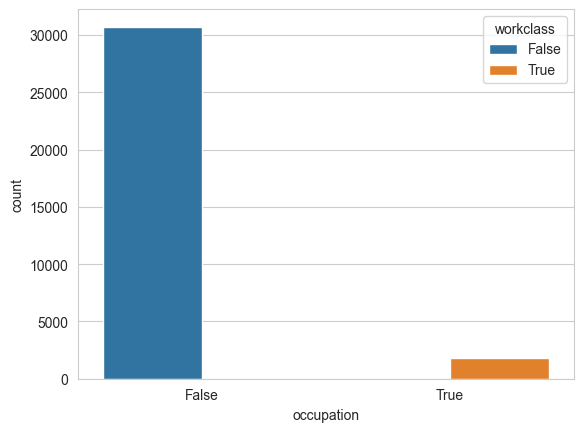

In [23]:
sns.countplot(data=df.isnull(), x='occupation', hue='workclass')

<AxesSubplot: xlabel='occupation', ylabel='count'>

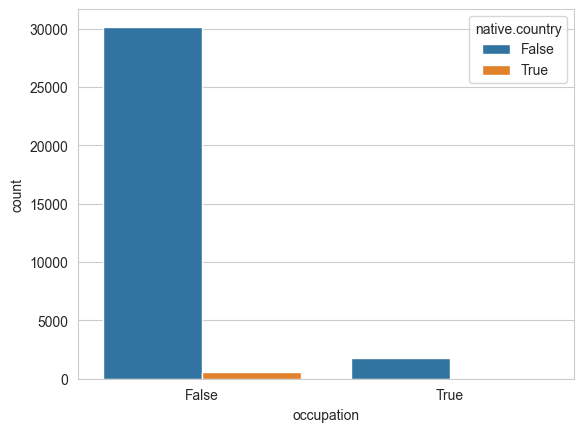

In [24]:
sns.countplot(data=df.isnull(), x='occupation', hue='native.country')

In [26]:
df[df['occupation'].isnull() & ~df['workclass'].isnull()]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
8874,18,Never-worked,206359,10th,6,Never-married,None,Own-child,White,Male,0,0,40,United-States,<=50K
13675,23,Never-worked,188535,7th-8th,4,Divorced,None,Not-in-family,White,Male,0,0,35,United-States,<=50K
17089,17,Never-worked,237272,10th,6,Never-married,None,Own-child,White,Male,0,0,30,United-States,<=50K
21934,18,Never-worked,157131,11th,7,Never-married,None,Own-child,White,Female,0,0,10,United-States,<=50K
24483,20,Never-worked,462294,Some-college,10,Never-married,None,Own-child,Black,Male,0,0,40,United-States,<=50K
32331,30,Never-worked,176673,HS-grad,9,Married-civ-spouse,None,Wife,Black,Female,0,0,40,United-States,<=50K
32338,18,Never-worked,153663,Some-college,10,Never-married,None,Own-child,White,Male,0,0,4,United-States,<=50K


In [27]:
df['occupation'].fillna('no-occupation', inplace=True)
df['workclass'].fillna('Never-worked', inplace=True)

In [28]:
df.select_dtypes('object').isnull().sum()

workclass           0
education           0
marital.status      0
occupation          0
relationship        0
race                0
sex                 0
native.country    583
income              0
dtype: int64

In [33]:
df[df['native.country'].isna()]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income


In [ ]:
df['native.country'].fillna('others', inplace=True)

In [34]:
df.select_dtypes('object').isnull().sum()

workclass         0
education         0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
native.country    0
income            0
dtype: int64

In [35]:
categories_show(df.select_dtypes('object'))

,0
native.country,42
education,16
occupation,15
workclass,8
marital.status,7
relationship,6
race,5
sex,2
income,2


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
native.country,United-States,others,Mexico,Greece,Vietnam,China,Taiwan,India,Philippines,Trinadad&Tobago,Canada,South,Holand-Netherlands,Puerto-Rico,Poland,Iran,England,Germany,Italy,Japan,Hong,Honduras,Cuba,Ireland,Cambodia,Peru,Nicaragua,Dominican-Republic,Haiti,El-Salvador,Hungary,Columbia,Guatemala,Jamaica,Ecuador,France,Yugoslavia,Scotland,Portugal,Laos,Thailand,Outlying-US(Guam-USVI-etc)
education,HS-grad,Some-college,7th-8th,10th,Doctorate,Prof-school,Bachelors,Masters,11th,Assoc-acdm,Assoc-voc,1st-4th,5th-6th,12th,9th,Preschool,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,no-occupation,Exec-managerial,Machine-op-inspct,Prof-specialty,Other-service,Adm-clerical,Craft-repair,Transport-moving,Handlers-cleaners,Sales,Farming-fishing,Tech-support,Protective-serv,Armed-Forces,Priv-house-serv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
workclass,Never-worked,Private,State-gov,Federal-gov,Self-emp-not-inc,Self-emp-inc,Local-gov,Without-pay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital.status,Widowed,Divorced,Separated,Never-married,Married-civ-spouse,Married-spouse-absent,Married-AF-spouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,Not-in-family,Unmarried,Own-child,Other-relative,Husband,Wife,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,White,Black,Asian-Pac-Islander,Other,Amer-Indian-Eskimo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,Female,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
income,<=50K,>50K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df.corr()

C:\Users\omers\AppData\Local\Temp\ipykernel_24556\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education.num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital.gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital.loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours.per.week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


In [38]:
object_df = df.select_dtypes(include='object')
numeric_df = df.select_dtypes(exclude='object')

df_objects_dummies = pd.get_dummies(object_df, drop_first=True)
df_encoded = pd.concat((numeric_df, df_objects_dummies), axis=1)
df_encoded.info()
df_encoded

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 100 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   age                                        32561 non-null  int64
 1   fnlwgt                                     32561 non-null  int64
 2   education.num                              32561 non-null  int64
 3   capital.gain                               32561 non-null  int64
 4   capital.loss                               32561 non-null  int64
 5   hours.per.week                             32561 non-null  int64
 6   workclass_Local-gov                        32561 non-null  uint8
 7   workclass_Never-worked                     32561 non-null  uint8
 8   workclass_Private                          32561 non-null  uint8
 9   workclass_Self-emp-inc                     32561 non-null  uint8
 10  workclass_Self-emp-not-inc                 32

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,native.country_others,income_>50K
0,90,77053,9,0,4356,40,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,82,132870,9,0,4356,18,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,66,186061,10,0,4356,40,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,54,140359,4,0,3900,40,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,41,264663,10,0,3900,40,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,310152,10,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
32557,27,257302,12,0,0,38,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
32558,40,154374,9,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
32559,58,151910,9,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [39]:
df_encoded.to_csv(processed_data_dir / file_name, index=False)